For my final project, I will be working with a data set found on Kaggle that contains data on the top 300 universities of the world. It contains several categories of data, including world ranking, country ranking, region, and acceptance rates.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
#Importing data into a data frame
data = pd.read_csv('Documents/college/Fall2022/320/Final data/archive/Top 300 universities of World.csv')
data

,name,world_ranking,region_ranking,country_ranking,region,country,city\state,acceptance_rate,publication,website,phone_no,address
0,Aarhus University,"#150 of 14,131","#44 of 2,785",#2 of 27,Europe,Italy,Veneto,15%,"89,633",www.au.dk,+45 8942 1111,"Nordre Ringgade 1\n Aarhus, Central Denmark Re..."
1,Arizona State University - Tempe,"#61 of 14,131","#48 of 2,597","#45 of 2,496",Europe,Spain,Valencia,NaN,"99,086",www.asu.edu,8552785080,"University Drive and Mill Avenue\n Tempe, Ariz..."
2,Auburn University,NaN,NaN,NaN,North America,United States,Wisconsin,57%,"36,231",auburn.edu,3348444000,"Samford Hall\n Auburn, Alabama, 36849 \nUnited..."
3,Australian National University,"#88 of 14,131",#5 of 59,#5 of 40,North America,Canada,Ontario,86%,"97,754",www.anu.edu.au,+61 (0)2 6125 5111,"Ellery Crescent, Acton\n Canberra, Australian ..."
4,Autonomous University of Barcelona,NaN,NaN,NaN,Europe,Italy,Emilia-Romagna,11%,"74,922",www.uab.cat,+34 935812222,"Campus de Bellaterra, Edificio A\n Cerdanyola ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Xi'an Jiaotong University,NaN,NaN,NaN,North America,United States,Connecticut,7%,"96,097",www.xjtu.edu.cn,+86 (29) 266 8830,"28 Xianning Road\n Xi'an, Shaanxi, 710049 \nChina"
296,Yale University,"#11 of 14,131","#9 of 2,597","#9 of 2,496",Asia,China,Xi'an,NaN,"198,095",www.yale.edu,2034324771,"Woodbridge Hall\n New Haven, Connecticut, 0652..."
297,Yonsei University,NaN,NaN,NaN,North America,United States,Washington,56%,"95,497",www.yonsei.ac.kr,+82 (2) 2123 2114,"134 Sinchon-dong, Seodaemun-gu\n Seoul, Seoul,..."
298,York University,NaN,NaN,NaN,Oceania,Australia,Canberra,33%,"41,257",yorku.ca,+1 (416) 736 5002,"4700 Keele Street\n Toronto, Ontario, M3J 1P3 ..."


I have created a few new data frames for future data exploration. The data frames created are: with_ranks which contains only the rows that do not have NA in the world_ranking column, filtered which contains only the rows that do not have NA in the world_ranking or acceptance_rate columns, and country_rank which contains only the rows that do not have NA in the country_ranking and acceptance_rate columns.

In [21]:
#Filtering by columns with NA
with_ranks = data[data['world_ranking'].notna()]
filtered = with_ranks[with_ranks['acceptance_rate'].notna()]
country_rank = data[data['country_ranking'].notna()]
country_rank = country_rank[country_rank['acceptance_rate'].notna()]

I now parse through the data to add new columns for ranks and acceptance by extracting just the integer value needed for the different data frames. First I am adding the integer value of world rankings into a column for the with_rank data frame.

In [22]:
ranks = []
split = []
for index, x in with_ranks.iterrows():
  var = x["world_ranking"]
  #Splitting to seperate from the unecessary values
  split = var.split()
  #The first value from the split (the rank) is saved to a temporary variable 
  temp = split[0]
  #Value is appended to the ranks array as an integer
  ranks.append(int(temp[1:]))
#New column is created with the world ranks
with_ranks['ranks'] = ranks
with_ranks

,name,world_ranking,region_ranking,country_ranking,region,country,city\state,acceptance_rate,publication,website,phone_no,address,ranks
0,Aarhus University,"#150 of 14,131","#44 of 2,785",#2 of 27,Europe,Italy,Veneto,15%,"89,633",www.au.dk,+45 8942 1111,"Nordre Ringgade 1\n Aarhus, Central Denmark Re...",150
1,Arizona State University - Tempe,"#61 of 14,131","#48 of 2,597","#45 of 2,496",Europe,Spain,Valencia,NaN,"99,086",www.asu.edu,8552785080,"University Drive and Mill Avenue\n Tempe, Ariz...",61
3,Australian National University,"#88 of 14,131",#5 of 59,#5 of 40,North America,Canada,Ontario,86%,"97,754",www.anu.edu.au,+61 (0)2 6125 5111,"Ellery Crescent, Acton\n Canberra, Australian ...",88
7,Boston University,"#49 of 14,131","#42 of 2,597","#39 of 2,496",Europe,Greece,Athens,NaN,"107,676",bu.edu,6173532000,"One Silber Way\n Boston, Massachusetts, 02215 ...",49
8,Brigham Young University - Provo,"#193 of 14,131","#99 of 2,597","#88 of 2,496",Europe,United Kingdom,England,58%,"36,150",www.byu.edu,8014224636,"Main Campus\n Provo, Utah, 84602 \nUnited States",193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Washington University in St Louis,"#44 of 14,131","#39 of 2,597","#37 of 2,496",North America,United States,Louisiana,NaN,"147,171",wustl.edu,3149355000,"One Brookings Drive\n Saint Louis, Missouri, 6...",44
291,Wayne State University,"#194 of 14,131","#100 of 2,597","#89 of 2,496",Europe,Spain,Barcelona,43%,"72,575",wayne.edu,3135772424,"656 West Kirby Street\n Detroit, Michigan, 482...",194
293,Western University,"#134 of 14,131","#79 of 2,597",#9 of 101,Europe,Netherlands,Amsterdam,20%,"87,102",uwo.ca,+1 (519) 661 2111,"1151 Richmond Street\n London, Ontario, N6A 3K...",134
296,Yale University,"#11 of 14,131","#9 of 2,597","#9 of 2,496",Asia,China,Xi'an,NaN,"198,095",www.yale.edu,2034324771,"Woodbridge Hall\n New Haven, Connecticut, 0652...",11


I am adding the integer value of country rankings and acceptance rates into columns for the country_rank data frame.

In [23]:
ranks = []
split = []
for index, x in country_rank.iterrows():
  var = x["country_ranking"]
  #Splitting to seperate from the unecessary values
  split = var.split()
  #The first value from the split (the rank) is saved to a temporary variable 
  temp = split[0]
  #Value is appended to the ranks array as an integer
  ranks.append(int(temp[1:]))
#New column is created with the ranks
country_rank['country_ranks'] = ranks
acceptance = []
for index, x in country_rank.iterrows():
  var = x["acceptance_rate"]
  #Cutting out the percentage sign and coverting the value to an int
  var = int(var[:-1])
  acceptance.append(var)
#Creating a new column with integer acceptance rates
country_rank["acceptance"] = acceptance

#Setting the data set to only contain data from the United States
country_rank = country_rank[country_rank['country'] == 'United States']

In [24]:
acceptance = []
ranks = []
for index, x in filtered.iterrows():
  var = x["acceptance_rate"]
  #Cutting out the percentage sign and coverting the value to an int
  var = int(var[:-1])
  acceptance.append(var)
for index, x in filtered.iterrows():
  var = x["world_ranking"]
  #Splitting to seperate from the unecessary values
  split = var.split()
  #The first value from the split (the rank) is saved to a temporary variable 
  temp = split[0]
  #Value is appended to the ranks array as an integer
  ranks.append(int(temp[1:]))
#Creating a new columns with integer acceptance rates and integer world ranks
filtered["acceptance"] = acceptance
filtered["ranks"] = ranks

Now let's explore this data set. Below we have a pie chart to observe the percentage frequency of the different regions in the top 300 universities in the world. Here we see North America with the highest frequency followed by Europe, Asia, Oceania, Latin America, and Africa.

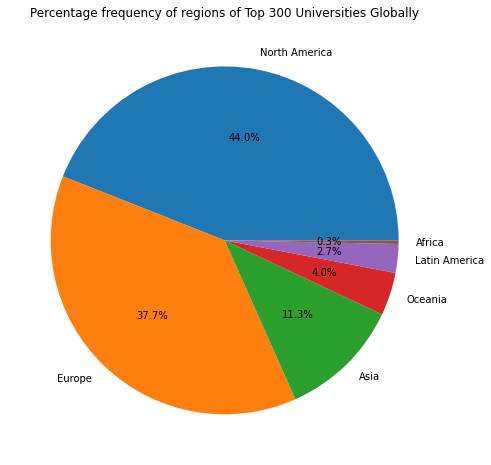

In [25]:
#Determining figure size and title
plt.figure(figsize=(10, 8))
plt.title("Percentage frequency of regions of Top 300 Universities Globally")
#Counting the frequency of each region at displaying it in a pie chart
s = data['region'].value_counts()#.plot(kind='pie')
plt.pie(s,labels = s.index, autopct= '%1.1f%%')
plt.show()

Below are the frequencies that we can use to compare against the pie chart visual.

In [26]:
#Displaying the frequency to compare against the pie chart 
print(data['region'].value_counts())

North America    132
Europe           113
Asia              34
Oceania           12
Latin America      8
Africa             1
Name: region, dtype: int64


Next, let's explore which region has the highest average ranking. Below we have a bar graph to demonstrate this. The highest average is in Asia, followed by Europe, Africa, North America, Oceania, and Latin America.

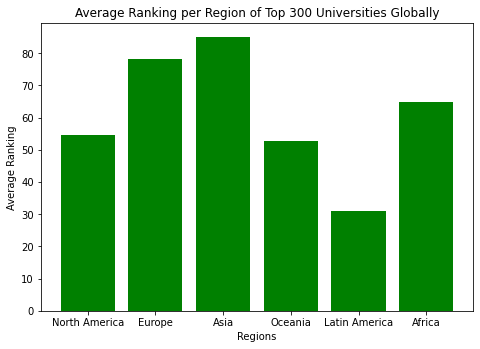

In [27]:
#Setting counter variables for each of the regions
North_America = 0
Europe = 0
Asia = 0
Oceania = 0
Latin_America = 0
Africa = 0
for index, x in with_ranks.iterrows():
  #Adding on the ranking for the region to the respective counter
  if x['region'] == 'North America':
    North_America += int(x['ranks'])
  elif x['region'] == 'Europe':
    Europe += int(x['ranks'])
  elif x['region'] == 'Asia':
    Asia += int(x['ranks'])
  elif x['region'] == 'Oceania':
    Oceania += int(x['ranks'])
  elif x['region'] == 'Latin America':
    Latin_America += int(x['ranks'])
  else:
    Africa += int(x['ranks'])

#Creating a bar graph of the averages
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#Creating a variable that includes all of the regions
regions = ['North America', 'Europe', 'Asia', 'Oceania', 'Latin America', 'Africa']
#Finding the averages of all of these regions, using the frequency found above
averages = [North_America/132 ,Europe/113,Asia/34,Oceania/12,Latin_America/8, Africa]
#Setting the values and titles of the bar graph 
plt.bar(regions, averages, color ='green',width = .8)
plt.xlabel("Regions")
plt.ylabel("Average Ranking")
plt.title("Average Ranking per Region of Top 300 Universities Globally")
plt.show()

In the United States, often times there is a belief that that unviersities with lower acceptance rate are more prestigious and are considered a better university. I wanted to test this as my hypothesis. I will be testing if acceptance rate and rankings have an direct correlation across different regions. Below I am beginning by futher parsing through my data to add acceptance rate and world ranking as a column in integer form.

Below we have a scatter plot of the univeristy ranks over acceptance rate for the top 300 universities in the world. From the graph we can see a negative regression line, which would reject our hypothesis of the direct relationship between acceptance rates and university ranks.

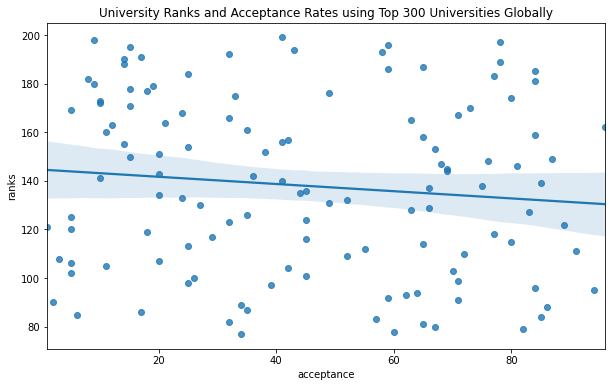

In [28]:
#Creating a scatter plot using seaborn
plt.figure(figsize=(10, 6))
#Setting the data as the acceptance and ranks columns from the 'filtered' data frame
sns.regplot("acceptance", "ranks", data=filtered)
plt.title("University Ranks and Acceptance Rates using Top 300 Universities Globally")
plt.show()

The linear regression line for this graph has a slope of -0.148176 as we see below. This confirms the inverse correlation seen in the graph above.

In [29]:
#Creating a formula from the ranks and acceptance columns of the filtered data frame
#to get the intercept and slope values
formula = ols(formula = "ranks ~ acceptance", data = filtered).fit()
print(formula.params)

Intercept     144.634193
acceptance     -0.148176
dtype: float64


I will now be testing this per region for the regions represented after dropping acceptance rates and world ranks that were NA. I created arrays with ranks and acceptance for North America, Europe, Asia, and Oceania and then created four seperate data frames for each region. 

In [30]:
#Creating arrays for the ranks and acceptances for each of the regions by filtering from the 'filtered' data frame by region value
NA_Rank = np.array(filtered.loc[filtered['region'] == 'North America']['ranks'].to_numpy())
NA_Acceptance = np.array(filtered.loc[filtered['region'] == 'North America']['acceptance'].to_numpy())

EU_Rank = np.array(filtered.loc[filtered['region'] == 'Europe']['ranks'].to_numpy())
EU_Acceptance = np.array(filtered.loc[filtered['region'] == 'Europe']['acceptance'].to_numpy())

AS_Rank = np.array(filtered.loc[filtered['region'] == 'Asia']['ranks'].to_numpy())
AS_Acceptance = np.array(filtered.loc[filtered['region'] == 'Asia']['acceptance'].to_numpy())

OC_Rank = np.array(filtered.loc[filtered['region'] == 'Oceania']['ranks'].to_numpy())
OC_Acceptance = np.array(filtered.loc[filtered['region'] == 'Oceania']['acceptance'].to_numpy())

#Creating a new data frame for each region and setting the columns equal to the arrays created above
NA = pd.DataFrame()
NA["Rank"] = NA_Rank
NA["Acceptance"] = NA_Acceptance
EU = pd.DataFrame()
EU["Rank"] = EU_Rank
EU["Acceptance"] = EU_Acceptance
AS = pd.DataFrame()
AS["Rank"] = AS_Rank
AS["Acceptance"] = AS_Acceptance
OC = pd.DataFrame()
OC["Rank"] = OC_Rank
OC["Acceptance"] = OC_Acceptance

Next, with the four data frames I have created 4 seperate scatter plots with regression lines to observe the correlation beteween rank and acceptance per region. For North America and Europe, we see a negative correlation, but for Asia and Oceania we see a positive correlation. Both North America and Europe seem to reject our hypothesis but Asia and Oceania support it.

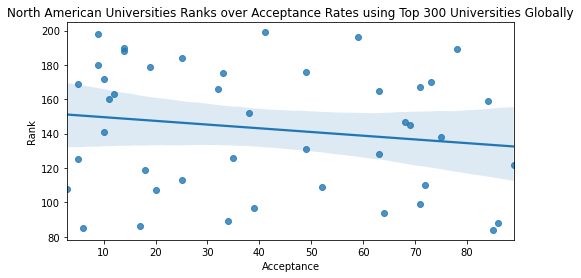

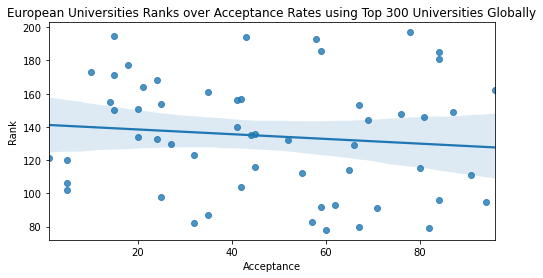

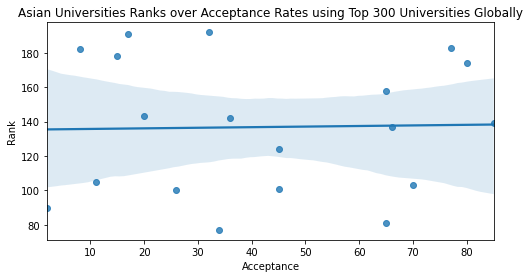

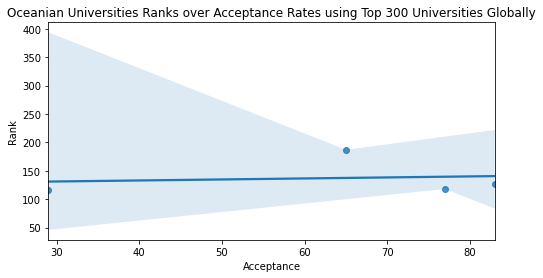

In [31]:
# Creating scatter plots for each of the regions by extracting data from the appropriate data frame created above
plt.figure(figsize=(8, 4))
sns.regplot("Acceptance", "Rank", NA)
plt.title("North American Universities Ranks over Acceptance Rates using Top 300 Universities Globally")
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot("Acceptance", "Rank", EU)
plt.title("European Universities Ranks over Acceptance Rates using Top 300 Universities Globally")
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot("Acceptance", "Rank", AS)
plt.title("Asian Universities Ranks over Acceptance Rates using Top 300 Universities Globally")
plt.show()

plt.figure(figsize=(8, 4))
sns.regplot("Acceptance", "Rank", OC)
plt.title("Oceanian Universities Ranks over Acceptance Rates using Top 300 Universities Globally")
plt.show()

Below I found the exact slopes for the regression lines of my regional graphs testing the correlation between rank and acceptance rates of universities. North America is -0.126175, Europe is -0.087535, Asia is 0.016058, and Oceania is .093283, which confirms the trends we saw in the graphs above.

In [32]:
#The following blocks are used to create a formula from the ranks and acceptance columns of the region's data frame
#to get the intercept and slope values
formula = ols(formula = "Acceptance ~ Rank", data = NA).fit()
print(formula.params)

Intercept    59.031571
Rank         -0.126175
dtype: float64


In [33]:
formula = ols(formula = "Acceptance ~ Rank", data = EU).fit()
print(formula.params)

Intercept    59.102708
Rank         -0.087535
dtype: float64


In [34]:
formula = ols(formula = "Acceptance ~ Rank", data = AS).fit()
print(formula.params)

Intercept    39.855157
Rank          0.016058
dtype: float64


In [35]:
formula = ols(formula = "Acceptance ~ Rank", data = OC).fit()
print(formula.params)

Intercept    50.696943
Rank          0.093283
dtype: float64


Since this hypothesis stemmed from trends I noticed in the perceptions of prestige in United States universities, I wanted to look at the correlation between acceptance rates and country ranking within the United States specifically. Since we saw an inverse correlation when looking at North America, I hypothesize that the United States will also portray an inverse correlation.

Below we have a scatter plot and regression line to display the correlation between country rank and acceptance in the United States. The line appears to show a slight inverse correlation.

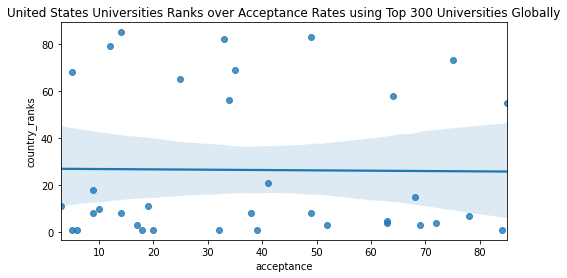

In [36]:
# Scatter plot figure size set and data set to the acceptance and country_ranks columns in the data frame country_rank
plt.figure(figsize=(8, 4))
sns.regplot("acceptance", "country_ranks", country_rank)
plt.title("United States Universities Ranks over Acceptance Rates using Top 300 Universities Globally")
plt.show()

With the slope of the regression line, we can see that the university ranks and acceptance rates actually had an inverse relationship, having a slope of -0.014188

In [37]:
#Create a formula from the country_rank and acceptance columns of the country_rank data frame
#to get the intercept and slope values
formula = ols(formula = "country_ranks ~ acceptance", data = country_rank).fit()
print(formula.params)

Intercept     27.016348
acceptance    -0.014188
dtype: float64


From this data exploration and analysis, it appears that there is no significant relationship between university ranks and acceptance rates and seems to vary by region. This could also vary with the criteria used to base the ranking on. For example, if the critieria were based on the number of output of something (for example incorporating the quanitiy of published papers), a school with a higher acceptance rate and larger student body may thrive. However, if we were basing the rank on some indicator of average performance of students after university, universities with a lower acceptance rate and more selective admissions process may thrive. Due to the subjectivity of the success of a university, from our data exploration it seems that using acceptance rates as an indicator of the success and quality of university is a flawed mentality that many hold.